In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [3]:
df = pd.DataFrame()
for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-freeway-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i  
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-asterix-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-asteroids-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-battle_zone-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-beam_rider-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-seaquest-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-space_invaders-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

for i in range(1,6):
  aux = pd.read_json('logs/comper_v5/staked_frames/v5-video_pinball-'+str(i)+'/progress.json',lines=True)
  aux["Trial"] = i
  aux["Rom"] = aux["Rom"].str.replace("_"," ")
  aux["Rom"] = aux["Rom"].str.capitalize()
  df=  df.append(aux)

df = df.set_index(["Trial"])
print(df.shape)

(3494, 15)


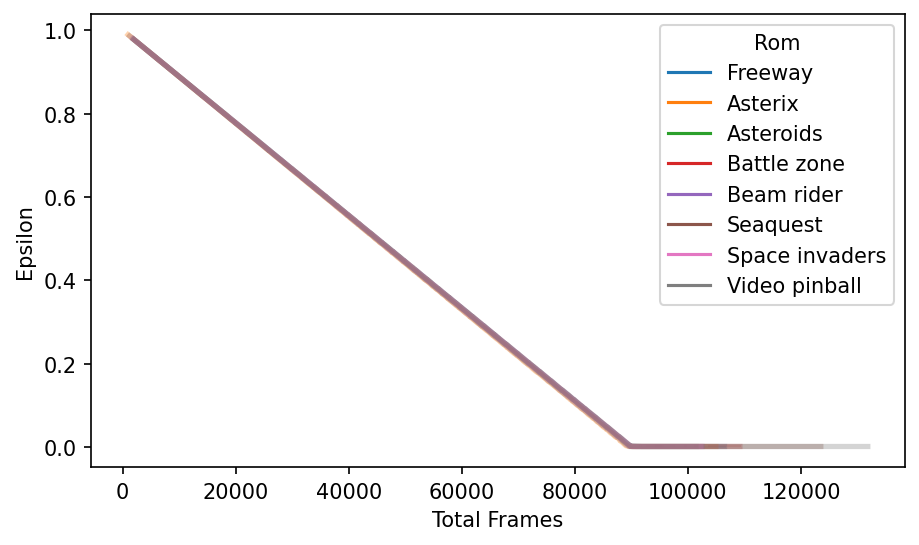

In [4]:
fig, axs = plt.subplots(ncols=1)
fig.set_figwidth(7)
fig.set_dpi(150)#sns.set(font_scale=0.5)
sns.lineplot(data=df, x="TotalFramesNumber", y="Eps",hue="Rom", linewidth=2.5,alpha=0.33).set(xlabel="Total Frames",ylabel="Epsilon")
sns.set_theme(style="whitegrid")#, palette="pastel")



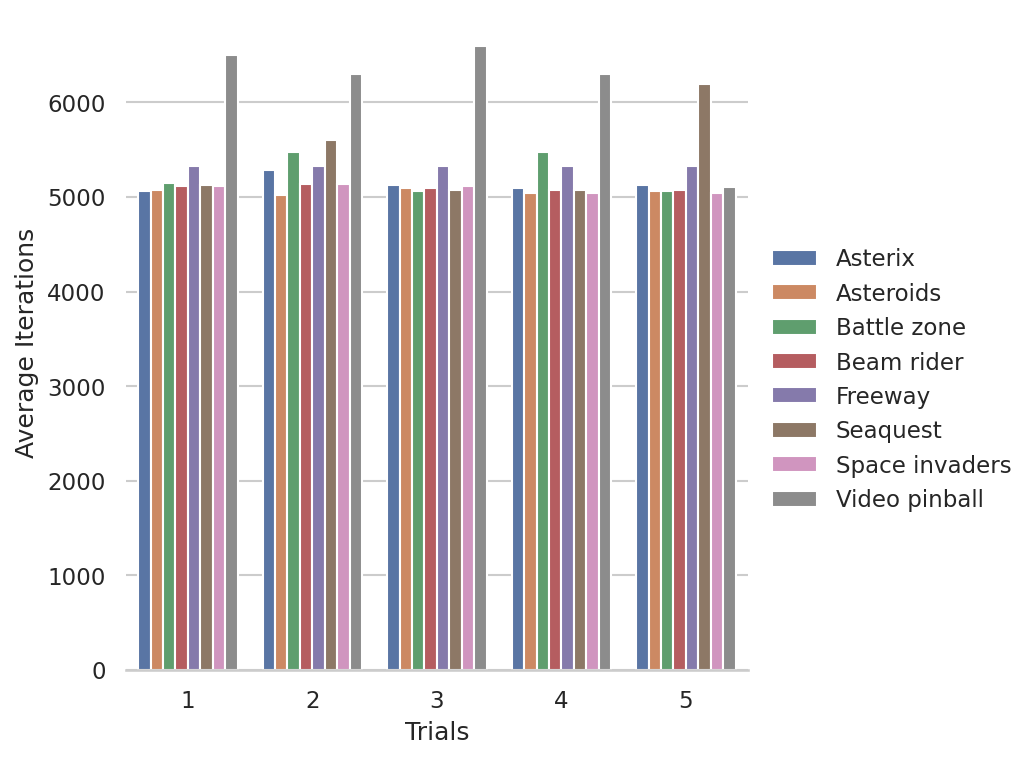

In [5]:
df_ = df.reset_index()[["Rom","Trial","Itr"]].groupby(["Rom","Trial"]).max("iter")
g = sns.catplot(data=df_.reset_index(), kind="bar", x="Trial", y="Itr", hue="Rom",ci=None)
g.despine(left=True)
g.fig.set_figwidth(7)
g.fig.set_dpi(150)
g.set_axis_labels("Trials", "Average Iterations")
g.legend.set_title("")
sns.set_theme(style="whitegrid")#, palette="pastel")

<AxesSubplot:xlabel='Episodes', ylabel='RTMCount'>

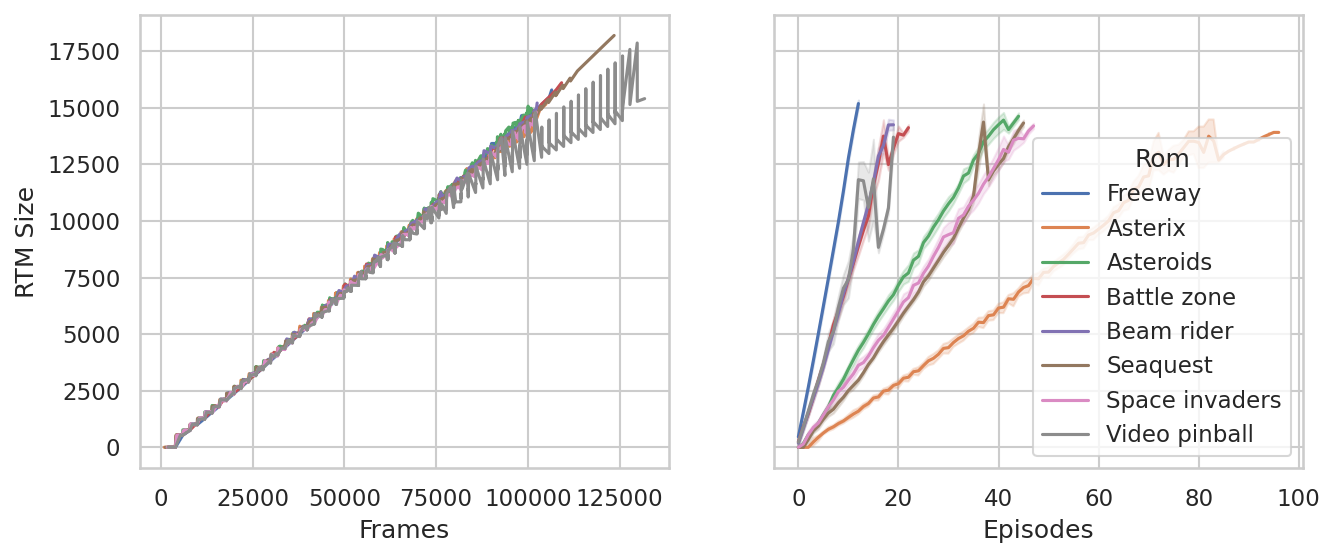

In [9]:
fig, axes = plt.subplots(1,2,sharey=True)
fig.set_figwidth(10)

fig.set_dpi(150)
df_ = df.reset_index()[["Rom","Trial","Episodes","RTMCount","TMCount","TotalFramesNumber"]]#.groupby(["Rom","Trial"]).max(["RTMCount","TMCount"])
sns.lineplot(data=df_,y="RTMCount",x="TotalFramesNumber",hue="Rom",ax=axes[0],legend=False).set(ylabel="RTM Size",xlabel="Frames")
sns.lineplot(data=df_,y="RTMCount",x="Episodes",hue="Rom",ax=axes[1])

<AxesSubplot:xlabel='Episodes', ylabel='TMCount'>

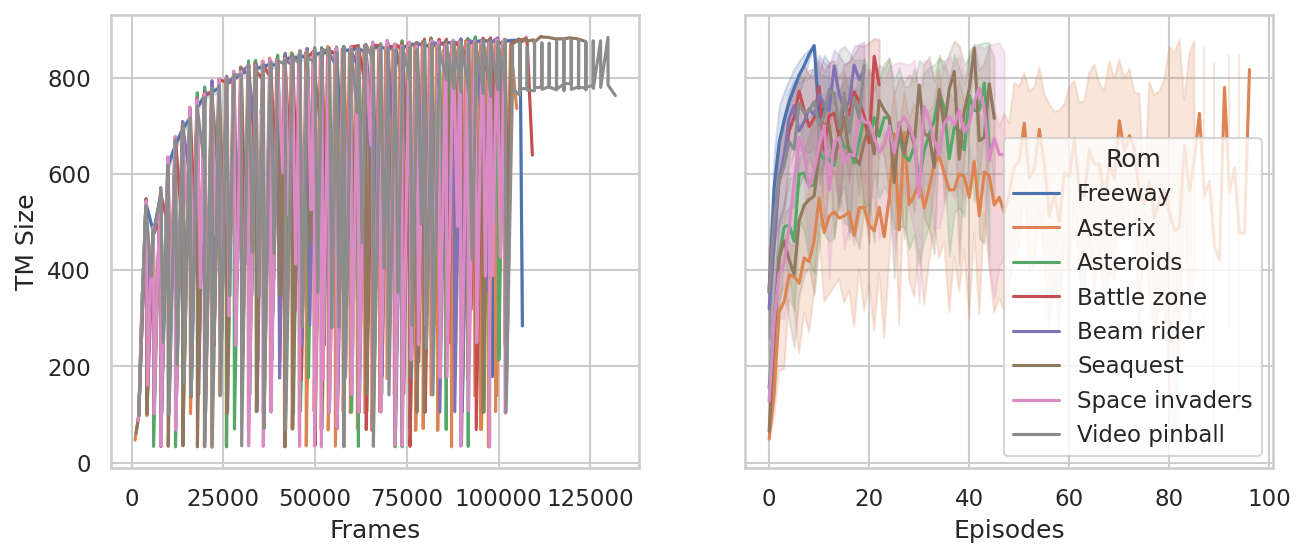

In [7]:
fig, axes = plt.subplots(1,2,sharey=True)
fig.set_figwidth(10)
#fig.set_figheight(5)
fig.set_dpi(150)

sns.lineplot(data=df_,y="TMCount",x="TotalFramesNumber",hue="Rom",ax=axes[0],legend=False).set(ylabel="TM Size",xlabel="Frames")
sns.lineplot(data=df_,y="TMCount",x="Episodes",hue="Rom",ax=axes[1])